<a href="https://colab.research.google.com/github/bonillahermes/Data_Science_Projects/blob/main/Ensamble_stacking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Modelos de Ensamble en Machine Learning: Stacking**

## **1. Introducción a los modelos de Ensamble**

Los **modelos de ensamble** (**Ensemble Learning Models**) son técnicas que combinan múltiples modelos de Machine Learning para mejorar la precisión y la robustez de las predicciones. La idea principal es que **la combinación de varios modelos puede superar el desempeño de cualquier modelo individual**.


### **¿Cómo funcionan los modelos de ensamble?**

Los modelos de ensamble funcionan al integrar varios modelos base (**weak learners**) y combinar sus predicciones de diferentes formas. Existen tres enfoques principales:

#### **1. Bagging (Bootstrap Aggregating)**
**Cómo funciona:**  
- Se generan múltiples subconjuntos de datos a partir del dataset original mediante **muestreo con reemplazo (bootstrap)**.  
- Se entrena un modelo independiente en cada subconjunto.  
- Se combinan sus predicciones mediante **votación (para clasificación) o promedio (para regresión)**.  

**Ventajas:** Reduce la varianza del modelo y ayuda a evitar el sobreajuste.  
**Desventaja:** No reduce el sesgo, por lo que no es efectivo en modelos con bajo rendimiento.

**Ejemplo más conocido:**  
- **Random Forest** (conjunto de árboles de decisión entrenados en distintos subconjuntos).

**Cuándo usarlo:**  
✔ Cuando un modelo individual (como un árbol de decisión) tiene alta varianza y sobreajusta.  
✔ Cuando se necesita un modelo estable y robusto frente a pequeños cambios en los datos.





#### Bagging (Paralelo)

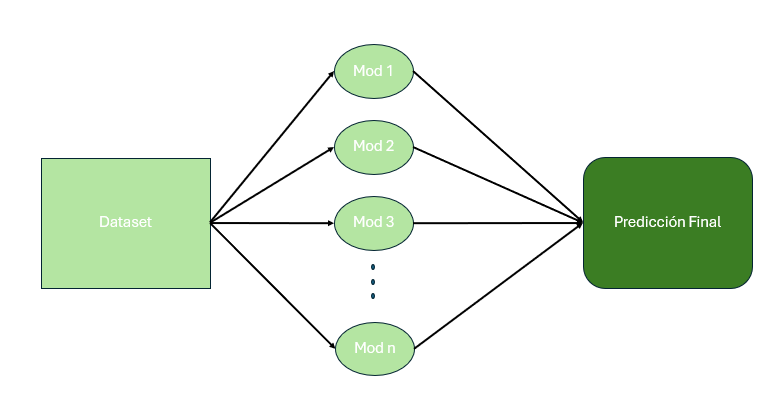


#### **2. Boosting**
**Cómo funciona:**  
- Se entrena un modelo inicial en el dataset completo.  
- Luego, se entrena otro modelo **corrigiendo los errores** del anterior, y así sucesivamente.  
- Los modelos finales se combinan ponderando su importancia.  

**Ventajas:** Reduce tanto el sesgo como la varianza, mejorando la precisión.  
**Desventaja:** Puede sobreajustarse si se entrena demasiado.  

**Ejemplos más conocidos:**  
- **AdaBoost** (Adapting Boosting)  
- **Gradient Boosting Machines (GBM)**  
- **XGBoost, LightGBM, CatBoost** (versiones optimizadas para grandes volúmenes de datos).  

**Cuándo usarlo:**  
✔ Cuando el problema tiene un alto sesgo y los modelos individuales no son suficientemente precisos.  
✔ En tareas con grandes volúmenes de datos y características complejas.  


#### Boosting (Secuencial)

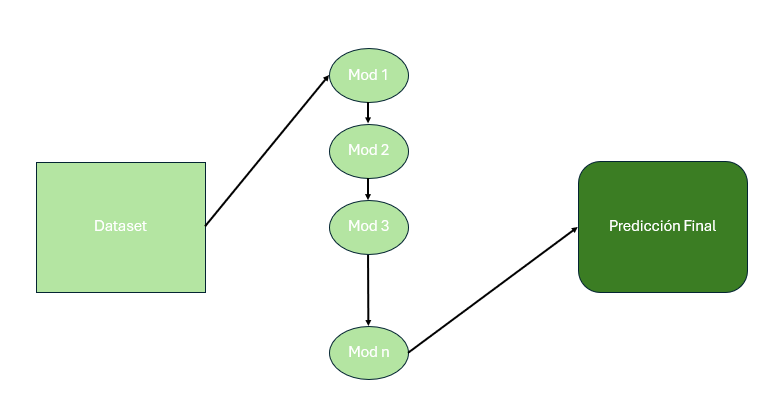

#### **3. Stacking (Stacked Generalization)**
**Cómo funciona:**  
- Se entrenan **varios modelos base** con diferentes algoritmos.  
- Se generan predicciones con estos modelos.  
- Se entrena un **modelo meta** sobre las predicciones de los modelos base para hacer la predicción final.  

**Ventajas:** Aprovecha lo mejor de diferentes modelos y mejora la generalización.  
**Desventaja:** Es más complejo y requiere más poder computacional.  

**Ejemplo más conocido:**  
- **StackingClassifier y StackingRegressor en Scikit-Learn**  
- **Ensamblados personalizados en competiciones de Kaggle**  

**Cuándo usarlo:**  
✔ Cuando se necesita el máximo rendimiento en predicciones.  
✔ En problemas donde diferentes modelos capturan distintos patrones de los datos.  



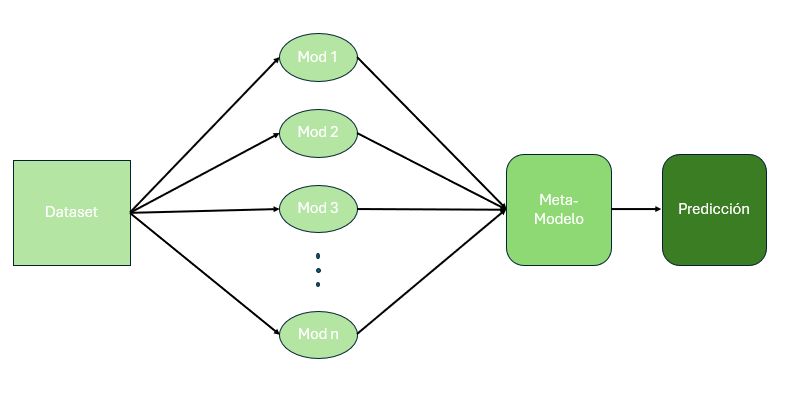


## **Diferencia entre Bagging, Boosting y Stacking**
| Característica | Bagging | Boosting | Stacking |
|--------------|---------|---------|---------|
| **Estrategia** | Paralelo, con muestreo bootstrap | Secuencial, corrigiendo errores | Combinación de modelos con un meta-modelo |
| **Objetivo** | Reducir la varianza | Reducir el sesgo | Mejorar la generalización |
| **Ejemplo** | Random Forest | XGBoost | StackingClassifier (Scikit-Learn) |



## **Implementación Práctica de Stacking**

El **Boston Housing Dataset** es un conjunto de datos ampliamente utilizado en análisis de regresión y aprendizaje automático. Contiene información sobre viviendas en los suburbios de Boston, Massachusetts, recopilada por el Servicio del Censo de EE. UU. El objetivo principal es predecir el valor medio de las viviendas ocupadas por sus propietarios en función de diversas características.

**Características del Dataset:**
- **Número de muestras:** 506
- **Número de variables:** 14

**Descripción de las Variables:**

1. **CRIM:** Tasa de criminalidad per cápita por ciudad.
2. **ZN:** Proporción de suelo residencial zonificado para lotes de más de 25,000 pies cuadrados.
3. **INDUS:** Proporción de acres comerciales no minoristas por ciudad.
4. **CHAS:** Variable ficticia que indica si el tramo limita con el río Charles (1: sí, 0: no).
5. **NOX:** Concentración de óxidos nítricos (partes por 10 millones).
6. **RM:** Número medio de habitaciones por vivienda.
7. **AGE:** Proporción de unidades ocupadas por propietarios construidas antes de 1940.
8. **DIS:** Distancias ponderadas a cinco centros de empleo en Boston.
9. **RAD:** Índice de accesibilidad a autopistas radiales.
10. **TAX:** Tasa de impuesto a la propiedad por cada $10,000.

El código implementa un modelo de **StackingRegressor** para predecir el precio medio de viviendas en California. Se emplean **siete modelos base**: **Random Forest, Gradient Boosting, AdaBoost, Bagging, SVR, Bayesian Ridge y Elastic Net**, cada uno capturando distintos patrones en los datos. Estos modelos generan predicciones individuales, que luego son combinadas por un **meta-modelo Bayesian Ridge**, encargado de aprender la mejor manera de ponderarlas y mejorar la precisión del modelo final. Se entrenan y evalúan tanto los modelos base como el Stacking, comparando métricas como **MAE, RMSE y R²** en entrenamiento y prueba, lo que permite analizar cuál ofrece el mejor desempeño y si el modelo presenta sobreajuste.

In [ ]:
# Librerías
import numpy as np
import pandas as pd
from sklearn.ensemble import StackingRegressor, RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import BayesianRidge, ElasticNet
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Cargar el dataset de Boston Housing
data = fetch_california_housing()
X, y = data.data, data.target  # Variable objetivo: Precio medio de la vivienda (MEDV)

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Definir modelos base
base_models = [
    ('rf', RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42)),
    ('gb', GradientBoostingRegressor(n_estimators=200, learning_rate=0.05, random_state=42)),
    ('ada', AdaBoostRegressor(n_estimators=100, learning_rate=0.1, random_state=42)),
    ('bagging', BaggingRegressor(n_estimators=100, random_state=42)),
    ('svr', SVR()),
    ('bayes_ridge', BayesianRidge()),
    ('elastic_net', ElasticNet())
]

# Modelo meta optimizado (Bayesian Ridge)
stacking_model = StackingRegressor(estimators=base_models, final_estimator=BayesianRidge())

In [ ]:
# Entrenar y evaluar modelos
models = base_models + [('stacking', stacking_model)]

for name, model in models:
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    mae_train = mean_absolute_error(y_train, y_pred_train)
    mae_test = mean_absolute_error(y_test, y_pred_test)
    mse_train = mean_squared_error(y_train, y_pred_train)
    mse_test = mean_squared_error(y_test, y_pred_test)
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)
    rmse_train = np.sqrt(mse_train)
    rmse_test = np.sqrt(mse_test)

    print(f'-----------------------------------')
    print(f'For Regressor: {name}')
    print(f'Training MAE: {mae_train:.2f}, Testing MAE: {mae_test:.2f}')
    print(f'Training RMSE: {rmse_train:.2f}, Testing RMSE: {rmse_test:.2f}')
    print(f'Training R2 Score: {r2_train:.2f}, Testing R2 Score: {r2_test:.2f}')
    print(f'-----------------------------------\n')


### **Comparación de Modelos: Análisis Crítico**

| Modelo         | MAE (Train) | MAE (Test) | RMSE (Train) | RMSE (Test) | R² (Train) | R² (Test) |
|---------------|------------|------------|--------------|-------------|------------|-----------|
| **Stacking**  | **0.14**   | **0.32**   | **0.21**     | **0.49**    | **0.97**   | **0.82**  |
| **Bagging**   | 0.12       | 0.33       | 0.19         | 0.51        | 0.97       | 0.80      |
| **RandomForest** | 0.29    | 0.37       | 0.41         | 0.54        | 0.87       | 0.77      |
| **Gradient Boost** | 0.36  | 0.37       | 0.51         | 0.54        | 0.81       | 0.78      |
| **AdaBoost**  | 0.60       | 0.61       | 0.74         | 0.75        | 0.59       | 0.57      |
| **Bayesian Ridge** | 0.53  | 0.53       | 0.72         | 0.75        | 0.61       | 0.58      |
| **Elastic Net** | 0.68    | 0.68       | 0.88         | 0.87        | 0.43       | 0.42      |
| **SVR**       | **0.87**  | **0.86**   | **1.17**     | **1.15**    | **-0.02**  | **-0.02** |


### **Resultados**
El **StackingRegressor** es el modelo con **mejor desempeño global**, ya que tiene:
✔ **El menor MAE (0.32)** en test, lo que significa menor error absoluto.  
✔ **El menor RMSE (0.49)** en test, penalizando menos los errores grandes.  
✔ **El mayor R² en test (0.82)**, indicando que explica el 82% de la variabilidad de los datos.  

**Sin embargo, hay aspectos que deben considerarse antes de elegirlo como la mejor opción.**


### **Limitaciones y Análisis Crítico**
**Posible sobreajuste:**  
- El modelo de **Stacking** tiene un **R² muy alto en entrenamiento (0.97)** y un descenso en test (0.82).  
- **Bagging** tiene una tendencia similar (0.97 en train, 0.80 en test), lo que indica **posible sobreajuste** en ambos modelos.

**Otros modelos ofrecen buenos resultados con menos sobreajuste:**  
- **Gradient Boosting (GB)** tiene métricas **similares a Random Forest** y no muestra tanto sobreajuste.  
- **Random Forest** también ofrece estabilidad con **buen R² en test (0.77)** y sin un desbalance tan grande entre entrenamiento y prueba.  
- **Bagging** tiene un desempeño casi tan bueno como Stacking, con un **MAE solo 0.01 mayor en test**, lo que sugiere que podría ser una opción más interpretable.

**Modelos con desempeño bajo:**  
- **SVR** es claramente el peor modelo, con un **R² negativo** en test, lo que indica que no capta la estructura de los datos.  
- **Elastic Net y Bayesian Ridge** también tienen R² bajos y errores más grandes, lo que los hace menos adecuados para esta tarea.

**Stacking es la mejor opción si se busca la máxima precisión**, pero debe evaluarse si el **costo computacional y la complejidad del modelo** justifican su uso.  
**Si se quiere un modelo más balanceado y fácil de interpretar**, **Random Forest o Bagging** pueden ser opciones viables sin sacrificar demasiado rendimiento.  
**Si se prioriza un modelo más simple con menor riesgo de sobreajuste**, **Gradient Boosting** es una excelente alternativa.  


### **¿Siempre funciona?**



#### **Modelo Stacking 2**

In [ ]:
# Seleccionar los tres mejores modelos base
base_models = [
    ('rf', RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42)),
    ('gb', GradientBoostingRegressor(n_estimators=200, learning_rate=0.05, random_state=42)),
    ('bayesian_ridge', BayesianRidge())
]

# Modelo meta: BaggingRegressor
stacking_model = StackingRegressor(estimators=base_models, final_estimator=BaggingRegressor(n_estimators=50, random_state=42))

# Entrenar y evaluar modelos con validación cruzada
models = base_models + [('stacking_final', stacking_model)]
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for name, model in models:
    scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='r2')
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    mae_train = mean_absolute_error(y_train, y_pred_train)
    mae_test = mean_absolute_error(y_test, y_pred_test)
    mse_train = mean_squared_error(y_train, y_pred_train)
    mse_test = mean_squared_error(y_test, y_pred_test)
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)
    rmse_train = np.sqrt(mse_train)
    rmse_test = np.sqrt(mse_test)

    print(f'-----------------------------------')
    print(f'For Regressor: {name}')
    print(f'Cross-Validation R2 Score: {scores.mean():.2f} ± {scores.std():.2f}')
    print(f'Training MAE: {mae_train:.2f}, Testing MAE: {mae_test:.2f}')
    print(f'Training RMSE: {rmse_train:.2f}, Testing RMSE: {rmse_test:.2f}')
    print(f'Training R2 Score: {r2_train:.2f}, Testing R2 Score: {r2_test:.2f}')
    print(f'-----------------------------------\n')

### **Análisis de Resultados del Segundo Modelo Stacking**  

Se evaluaron cuatro modelos: **Random Forest (rf), Gradient Boosting (gb), Bayesian Ridge (bayesian_ridge) y Stacking (stacking_final)**. Se utilizaron métricas como **MAE, RMSE y R²**, junto con una validación cruzada de 5 pliegues.


### **Comparación de Modelos**
| Modelo            | Cross-Val R²  | MAE (Train) | MAE (Test) | RMSE (Train) | RMSE (Test) | R² (Train) | R² (Test) |
|------------------|--------------|-------------|------------|--------------|-------------|------------|-----------|
| **Random Forest**  | **0.78 ± 0.01** | **0.29** | **0.37**  | **0.41**   | **0.54**   | **0.87**   | **0.77**  |
| **Gradient Boosting** | **0.79 ± 0.01** | 0.36 | **0.37**  | 0.51   | **0.54**   | 0.81   | **0.78**  |
| **Bayesian Ridge** | 0.61 ± 0.01 | 0.53 | 0.53  | 0.72   | 0.75   | 0.61   | 0.58  |
| **Stacking**  | 0.77 ± 0.01 | 0.32 | **0.37**  | 0.47   | 0.55   | 0.83   | **0.77**  |


### **Resultados**
1. **Gradient Boosting tiene la mejor validación cruzada con R² de 0.79 ± 0.01**, mostrando una buena capacidad de generalización.  
2. **Random Forest tiene un R² muy similar (0.78), pero menor riesgo de sobreajuste** (menor diferencia entre entrenamiento y prueba).  
3. **Stacking logra métricas comparables a los modelos individuales, pero no mejora sustancialmente el rendimiento general**. En particular:
   - Su **MAE en test es el mismo que Random Forest y Gradient Boosting (0.37)**.
   - Su **R² en test (0.77) es igual al de Random Forest y ligeramente inferior a Gradient Boosting**.
   - Su **Cross-Val R² (0.77) tampoco supera a los modelos base**.
4. **Bayesian Ridge muestra el peor desempeño** con un **R² de 0.58 en test** y una validación cruzada de **0.61**, lo que confirma que modelos lineales simples no son adecuados para este problema.

5. **Stacking no logró mejorar el rendimiento de los modelos base**, lo que sugiere que la combinación de predicciones no aportó un beneficio adicional.  
6. **Gradient Boosting y Random Forest son las mejores opciones**, con Gradient Boosting obteniendo el mejor rendimiento en validación cruzada.  
7. El meta-modelo Bagging podría no estar optimizando correctamente las predicciones de los modelos base, por lo que se podría probar con **un modelo más simple como una Regresión Ridge o una Red Neuronal**.  


### **Teoría Matemática del Stacking**  

Un modelo de **Stacking** se basa en la combinación de múltiples modelos base mediante un **meta-modelo** que aprende a integrar sus predicciones para mejorar la precisión. La idea fundamental es transformar las predicciones individuales de los modelos base en una nueva representación de los datos de entrada, sobre la cual se ajusta el meta-modelo.  

#### **Formalización Matemática**  

Dado un conjunto de entrenamiento $X$ con etiquetas $y$, se entrenan $n$ modelos base $ f_1, f_2, ..., f_n $. Cada modelo genera una predicción parcial:  

$$
\hat{y}_1 = f_1(X), \quad \hat{y}_2 = f_2(X), \quad \dots, \quad \hat{y}_n = f_n(X)
$$

Estas predicciones se convierten en un nuevo conjunto de características:  

$$
Z = [\hat{y}_1, \hat{y}_2, ..., \hat{y}_n]
$$

El meta-modelo $g(Z)$ aprende una función de combinación sobre estas predicciones para generar la predicción final:

$$
\hat{y} = g(\hat{y}_1, \hat{y}_2, ..., \hat{y}_n)
$$

El objetivo del meta-modelo es minimizar una función de pérdida $L$, que puede ser el error cuadrático medio en regresión:

$$
L(y, \hat{y}) = \frac{1}{m} \sum_{i=1}^{m} (y_i - \hat{y}_i)^2
$$

o la entropía cruzada en clasificación:

$$
L(y, \hat{y}) = -\sum_{i=1}^{m} y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i)
$$

El meta-modelo aprende la mejor manera de ponderar las predicciones de los modelos base para reducir el error de generalización.

---

### **Justificación Estadística**  

El error total de un modelo de aprendizaje automático se descompone en tres componentes principales:

$$
Error = Sesgo^2 + Varianza + Ruido
$$

#### **Reducción del Sesgo y la Varianza con Stacking**  

- **Sesgo**: Es el error introducido por la simplificación del modelo. Modelos como la regresión lineal suelen tener alto sesgo.
- **Varianza**: Es el error causado por la sensibilidad del modelo a pequeñas variaciones en los datos de entrenamiento. Modelos como los árboles de decisión tienden a tener alta varianza.
- **Ruido**: Es el error inherente a los datos, que no puede ser reducido por el modelo.

El **Stacking** ayuda a reducir tanto el sesgo como la varianza mediante la combinación óptima de modelos:

1. **Reducción del sesgo:** El meta-modelo puede compensar errores sistemáticos en los modelos base al aprender patrones que estos no captaron.
2. **Reducción de la varianza:** La combinación de varios modelos base ayuda a reducir la dependencia de un único modelo sobreajustado.
3. **Minimización del error de generalización:** Al integrar predicciones de modelos diversos, se obtiene un modelo final con mejor capacidad de generalización.

Mientras que **Bagging (ejemplo: Random Forest)** se enfoca en reducir la varianza y **Boosting (ejemplo: XGBoost)** en reducir el sesgo, **Stacking combina ambas ventajas**, permitiendo capturar múltiples patrones en los datos sin depender de una única familia de modelos.

En aplicaciones reales, el **Stacking** es particularmente útil en problemas donde diferentes modelos base pueden aportar información complementaria, lo que lo convierte en una técnica potente para mejorar la precisión en tareas de regresión y clasificación.